In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import average_precision_score, roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import average_precision_score, roc_auc_score

# генерируем данные 
X, y = make_classification(n_samples=10, n_features=5, 
                           n_classes=2,  
                           n_redundant=2, random_state=42)

In [2]:
class logistic_loss():
    @staticmethod
    def loss(x):
        return 1/(1-np.exp(-x))

    @staticmethod
    def antigradient(y, y_pred):
        return y - y_pred

class crossentropy_loss():
    @staticmethod
    def antigradient(y, y_pred):
        return - (y / y_pred) + (1 - y) / (1 - y_pred)

class mse_loss():
    @staticmethod
    def loss(y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)

    @staticmethod
    def antigradient(y, y_pred):
        return y - y_pred

class GradientBoosting(object):
    def __init__(self, n_estimators, type, learning_rate=0.1, max_depth=2):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.type = type
        self.trees = []

        if self.type == 'classification':
            self.loss = logistic_loss
        elif self.type == 'regression':
            self.loss = mse_loss
        else:
            raise Exception("Type must be classification or regression")

        for _ in range(n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            self.trees.append(tree)


    def fit(self, X, y):
        y_pred = np.zeros(y.shape)
        for t in range(self.n_estimators):
            print("=============================================")
            print("step: ", t)
            print("y_true: ", y)
            residuals = self.loss.antigradient(y, y_pred)
            print("residuals: ", residuals)
            self.trees[t].fit(X, residuals)
            predictions = self.trees[t].predict(X)
            print("predictions: ", predictions)
            y_pred += self.learning_rate * predictions
            print("y_pred: ", y_pred)
            print("Loss: ", np.mean(y-y_pred))

    def predict(self, X):
        y_pred = np.zeros((X.shape[0],))
        for i, tree in enumerate(self.trees):
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


In [3]:
gbm = GradientBoosting(n_estimators=50, type='classification')
gbm.fit(X, y)

('step: ', 0)
('y_true: ', array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0]))
('residuals: ', array([0., 1., 1., 1., 1., 0., 0., 1., 0., 0.]))
('predictions: ', array([0., 1., 1., 1., 1., 0., 0., 1., 0., 0.]))
('y_pred: ', array([0. , 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0.1, 0. , 0. ]))
('Loss: ', 0.45)
('step: ', 1)
('y_true: ', array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0]))
('residuals: ', array([0. , 0.9, 0.9, 0.9, 0.9, 0. , 0. , 0.9, 0. , 0. ]))
('predictions: ', array([0. , 0.9, 0.9, 0.9, 0.9, 0. , 0. , 0.9, 0. , 0. ]))
('y_pred: ', array([0.  , 0.19, 0.19, 0.19, 0.19, 0.  , 0.  , 0.19, 0.  , 0.  ]))
('Loss: ', 0.4050000000000001)
('step: ', 2)
('y_true: ', array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0]))
('residuals: ', array([0.  , 0.81, 0.81, 0.81, 0.81, 0.  , 0.  , 0.81, 0.  , 0.  ]))
('predictions: ', array([0.  , 0.81, 0.81, 0.81, 0.81, 0.  , 0.  , 0.81, 0.  , 0.  ]))
('y_pred: ', array([0.   , 0.271, 0.271, 0.271, 0.271, 0.   , 0.   , 0.271, 0.   ,
       0.   ]))
('Loss: ', 0.36449999999999994)
('step: ', 3)

In [67]:
y_pred = gbm.predict(X)
print(y_pred)

[0.         0.99484622 0.99484622 0.99484622 0.99484622 0.
 0.         0.99484622 0.         0.        ]


In [55]:
def plot_validation_curve(train_scores, test_scores, start_lim=0.9, end_lim=1.02, x_st=0, x_end=0):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel("parametr")
    plt.ylabel("Score")
    plt.ylim(start_lim, end_lim)
    plt.xlim(x_st, x_end)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

n_estimators [default=100] - число итераций градиентного бустинга.

В отличие от случайных деревьев, в бустинге увеличение числа деревьев не
всегда приводит к улучшению качества решения на тесте. 

In [61]:
param_range = range(1, 110, 10)
param_range

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]

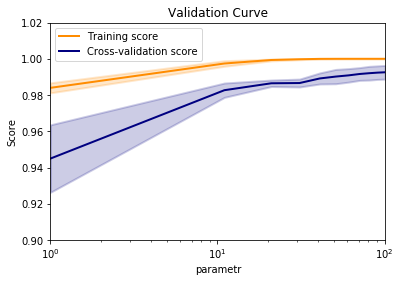

In [62]:
param_range = range(1, 110, 10)
train_scores, test_scores = validation_curve(
    XGBClassifier(), X, y, param_name="n_estimators", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

eta / learning_rate [default=0.3] - темп обучения, перед добавлением дерева в композицию оно умножается на eta. Используется для предотвращения переобучения за счёт "сокращения" весов базовых алгоритмов, делая модель более

Число деревьев, при котором качество
максимально, зависит от темпа обучения: чем меньше темп, тем больше
деревьев нужно, но зависимость нелинейная.

При оптимизации параметров обычно фиксируют число деревьев (оно должно
быть не очень большим, чтобы алгоритм быстро обучался), подбирая под него 
темп и значения остальных параметров. При построении итогового алгоритма
увеличивают число деревьев и находят соответствующее значение темпа
(оставляя остальные параметры неизменными).

In [63]:
param_range = np.arange(0.1, 1, 0.1)
param_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

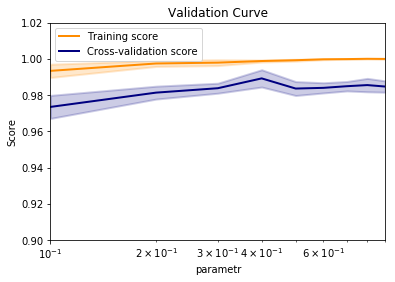

In [64]:
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=5), X, y, param_name="learning_rate", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

gamma [default=0] - минимальное снижение значения функции потерь, необходимое для дальнейшего разбиения вершины дерева. Большие значения gamma > 0 приводят к более консервативным моделям. Диапазон: [0, $\infty$).

gamma – порог на уменьшение функции ошибки при расщеплении в дереве

In [65]:
param_range = np.arange(0.5, 5, 0.1)
param_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

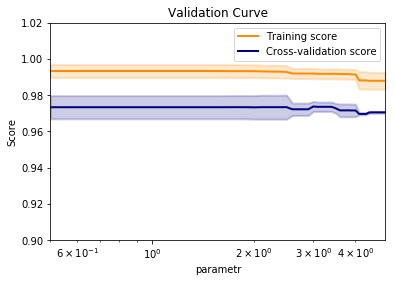

In [66]:
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=5), X, y, param_name="gamma", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

max_depth [default=6] - максимальная глубина дерева. Диапазон: [1, $\infty$).

In [42]:
X.shape

(569, 30)

In [67]:
param_range = np.arange(1, 11, 1)
param_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

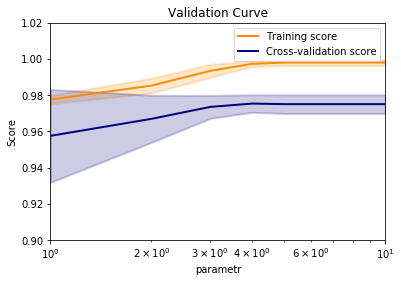

In [68]:
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=5), X, y, param_name="max_depth", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

min_child_weight [default=1] - минимальное необходимое (взвешенное) число примеров в каждой вершине. Чем больше, тем более консервативна итоговая модель. Диапазон: [0, $\infty$).

In [69]:
param_range = np.arange(1, 11, 1)
param_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

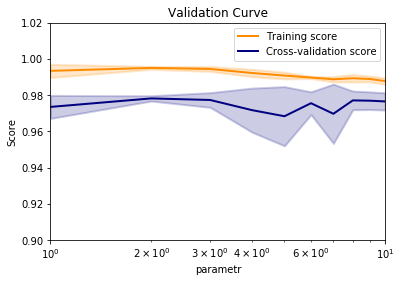

In [70]:
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=5), X, y, param_name="min_child_weight", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

subsample [default=1] - доля выборки, используемая для обучения каждого дерева. Если subsample < 1, то выбирается случайная подвыборка, что помогает в борьбе с переобучением. Диапазон: (0, 1]

subsample / bagging_fraction – какую часть объектов обучения
использовать для построения одного дерева

In [72]:
param_range = np.arange(0.1, 1.1, 0.1)
param_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

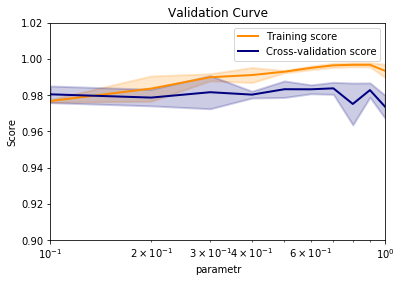

In [73]:
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=5), X, y, param_name="subsample", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

colsample_bytree [default=1] - доля признаков, используемая для обучения каждого дерева. Диапазон: (0, 1]

In [74]:
param_range = np.arange(0.1, 1.1, 0.1)
param_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

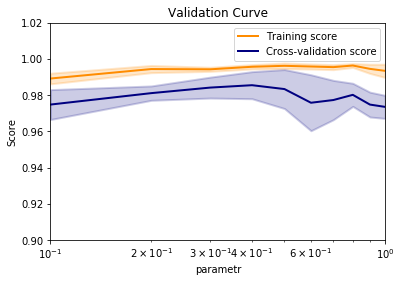

In [75]:
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=5), X, y, param_name="colsample_bytree", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

lambda / lambda_l2 [default=1] - коэффициент перед $L_2$-регуляризатором в функции потерь.

In [76]:
param_range = np.arange(0.1, 1.1, 0.1)
param_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

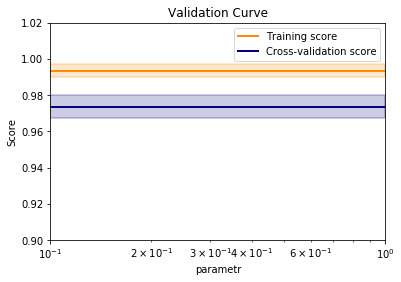

In [78]:
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=5), X, y, param_name="lambda", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

alpha [default=0] - коэффициент перед $L_1$-регуляризатором в функции потерь.

In [80]:
param_range = np.arange(0.1, 1.1, 0.1)
param_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

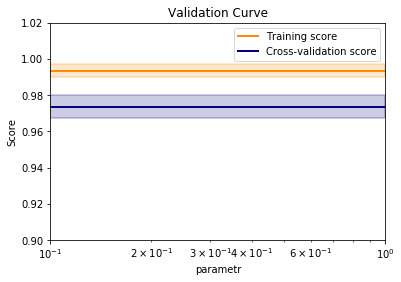

In [81]:
train_scores, test_scores = validation_curve(
    XGBClassifier(n_estimators=5), X, y, param_name="alpha", param_range=param_range,
    scoring="roc_auc", n_jobs=-1)

plot_validation_curve(train_scores, test_scores, x_st=param_range[0], x_end=param_range[-1:][0])

## Optimization

In [14]:
from sklearn.metrics import average_precision_score, roc_auc_score

X, y = make_classification(n_samples=100000, n_features=20, 
                           n_classes=2, n_informative=5, 
                           n_redundant=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=42)

In [17]:
%%time

xgb = XGBClassifier(tree_method='hist', n_estimators=1000)
xgb.fit(X_train, y_train)
pred_test = xgb.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, pred_test))

[11:48:28] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
0.9866178168261558
CPU times: user 17.2 s, sys: 79.9 ms, total: 17.3 s
Wall time: 17.3 s


In [18]:
%%time

xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train, y_train)
pred_test = xgb.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, pred_test))

0.9862695745791699
CPU times: user 2min 5s, sys: 43.5 ms, total: 2min 5s
Wall time: 2min 5s
